# Phase Tracking of BPSK Signal

###### Recovering the Phase of a signal is important to understand a wirelessly transmitted signal, this program is written to take a real BPSK signal and apply a phase shift and time delay to it. It will then recover the phase shift and time delay from the transmitted signal and adjust it to the original signal

# Import Modules

In [1]:
from matplotlib import pyplot
from cmath import *
import numpy as np
from numpy import matlib

# Definitions

In [2]:
def prompter(msg):
    
    while True:
        try:
            val = input(msg)
            
            inp = eval(val)
            break

        except NameError:
            print('That\'s not a number')
        except SyntaxError:
            print('Use a math symbol for clarity')
    return inp

In [3]:
def sigplot(num_samples, complex_signal):
    pyplot.plot(np.arange(0, num_samples), complex_signal.real)
    pyplot.plot(np.arange(0, num_samples), complex_signal.imag)
    pyplot.show()

In [4]:
seq_len = prompter('Enter sequence length: ')
sps = prompter('Enter Samples per Symbol: ')

Enter sequence length: 100
Enter Samples per Symbol: 5


In [5]:
numsamp = seq_len * sps

#### Specify Carrier information

In [6]:
Fc = prompter('Enter Carrier Frequency: ')
        
T = 1/Fc
t = np.asarray([x*T/numsamp for x in range(0, numsamp)]) 

Enter Carrier Frequency: 915e6


In [7]:
ampl = prompter('Enter Signal Amplitude: ')

Enter Signal Amplitude: 1


In [8]:
phase_shift = prompter('Enter a phase shift in radians: ')
phase = np.complex(sin(phase_shift), cos(phase_shift))
time_delay = prompter('Enter a time delay in samples: ')

Enter a phase shift in radians: 3*pi/2
Enter a time delay in samples: 0


#### Generate Signals

In [9]:
baseband = (np.sign(np.random.rand(1,seq_len)-0.5)+1)/2;

sampled_signal = matlib.repmat(baseband, sps, 1)
full_signal = np.reshape(sampled_signal, sampled_signal.size, 1)

#### Plot Original Baseband Signal

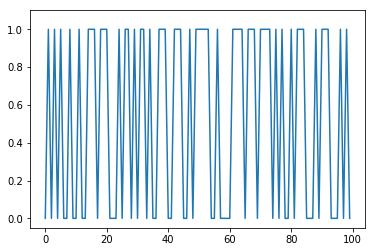

In [10]:
pyplot.plot(np.arange(0,seq_len) , baseband.flatten())
pyplot.ylim(top=1.1)
pyplot.show()

#### Plot Sampled Baseband Signal

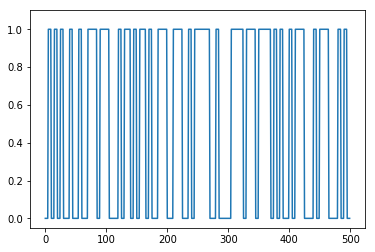

In [11]:
pyplot.plot(np.arange(0,numsamp) , full_signal)
pyplot.ylim(top=1.1)
pyplot.show()

#### Create Complex Noise Signal

In [12]:
noise_strength = prompter('Enter Noise Strength: ')
n_rsig = (np.random.rand(1,numsamp)-0.5)*noise_strength;
n_isig = (np.random.rand(1,numsamp)-0.5)*noise_strength;

Enter Noise Strength: 0


In [13]:
noise = np.vectorize(complex)(n_rsig.flatten(), n_isig.flatten())

#### Create Modulated Signal Waveform 

In [14]:
V = ampl*np.vectorize(cos)(2*pi*Fc*t + full_signal*pi)

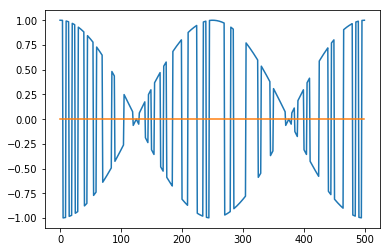

In [15]:
sigplot(numsamp, V)

#### Add Noise, Time Delay, and Phase shift to Modulated Signal Waveform

In [16]:
symbV1 = np.vectorize(cos)(2*pi*Fc*t)
symbV2 = np.vectorize(cos)(2*2*pi*Fc*t)
symbV1Q = np.vectorize(sin)(2*pi*Fc*t)
symbV2Q = np.vectorize(sin)(2*2*pi*Fc*t)

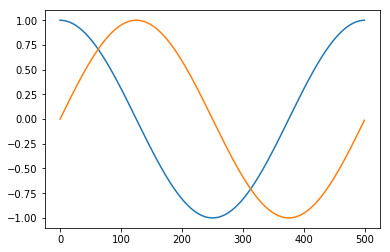

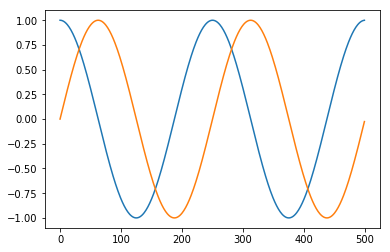

In [17]:
sigplot(numsamp, np.vectorize(complex)(symbV1, symbV1Q))
sigplot(numsamp, np.vectorize(complex)(symbV2, symbV2Q))

In [18]:
ss = 2*V

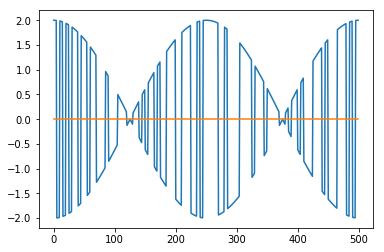

In [19]:
sigplot(len(V), ss)

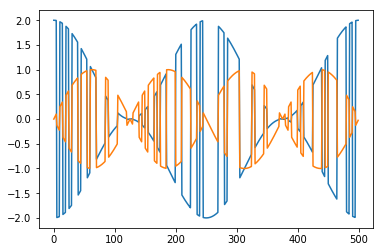

In [20]:
sigplot(len(V), ss*np.vectorize(complex)(symbV1, symbV1Q))

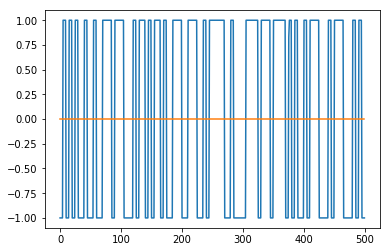

In [21]:
sigplot(len(V), -ss*np.vectorize(complex)(symbV1, symbV1Q)/(1 + np.vectorize(complex)(symbV2, symbV2Q)))

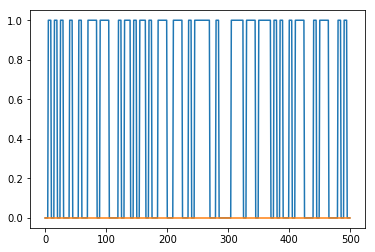

In [22]:
sigplot(len(full_signal), full_signal)

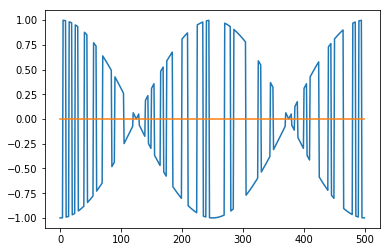

In [23]:
noise_added = V + noise
time_shifted = np.roll(noise_added, time_delay)
over_air = time_shifted * phase

sigplot(numsamp, over_air)

#### Square the Signal for recovery

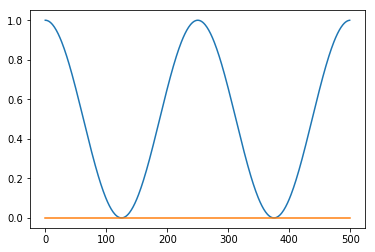

In [24]:
over_air_squared = pow(over_air, 2)
sigplot(numsamp, over_air_squared)

#### Get the magnitude of the signal

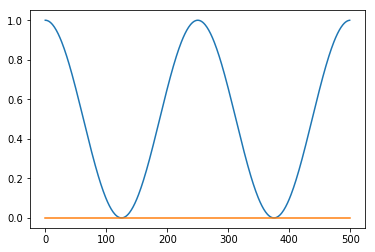

In [25]:
abs_over_air_squared = pow(abs(over_air),2)
sigplot(numsamp, abs_over_air_squared)

#### Get the Phase correction by magnitude squared over the signal squared 

In [26]:
phase_correction = np.vectorize(sqrt)(abs_over_air_squared/over_air_squared)


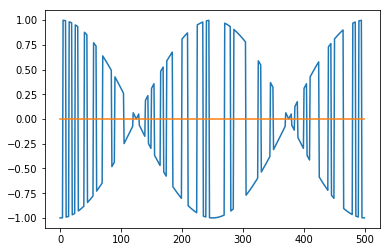

In [27]:
phase_corr_over_air = phase_correction*over_air
sigplot(numsamp, phase_corr_over_air)